# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.
## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7
    )

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100.0, 100.0, 400)
x2 = np.linspace(-100.0, 100.0, 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

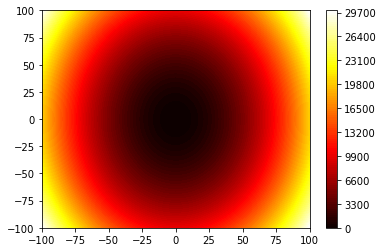

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap="hot")
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$? Please fill below both the mathematical expression and within the code.

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1 + 0.9π * sin(3πx_1)  \textbf{ (0.15 pt)}\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 + 1.6π * sin(4πx_2)  \textbf{ (0.15 pt)}\\
\end{align*}

In [6]:
# =========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
# =========
# Implement the gradient for the considered f(x).
def grad(x):
    #rewrite what was calculated by hand for both partial derivatives 
    grad_x1 = 2.0 * x[:, 0] + 0.9 * np.pi * np.sin(3.0 * np.pi * x[:, 0])
    grad_x2 = 4.0 * x[:, 1] + 1.6 * np.pi * np.sin(4.0 * np.pi * x[:, 1])
    #store both values in an array and match the input shape by taking the transpose
    grad = np.array([grad_x1, grad_x2]).T 
    
    return grad

In [7]:
# =========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
# =========
# Implement the gradient descent (GD) optimization algorithm.
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size

    def step(self, x_old):
        #calculate the gradient of x_old
        gradient = self.grad(x_old)
        #calculate the new value by subtracting the multiplication of previously calculated gradient and step size from the old value
        x_new = x_old - (self.step_size * gradient)
        
        return x_new

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

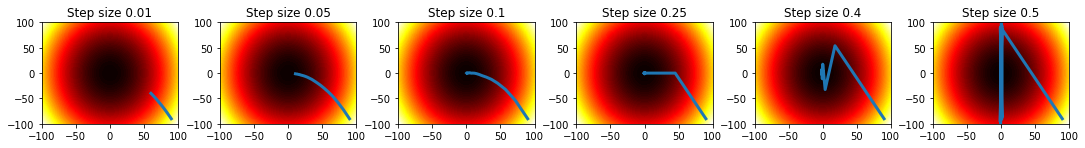

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the GD
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size. What happens in the small and large step sizes and what is the optimum step size?

**Answer**: The smaller the step size, the more precisely the algorithm moves to the direction of the minimum. In the case of smaller steps we can say that it takes smaller but more correct and precise steps. If we take a larger step size, we can see that it may go in the wrong direction, resulting in not an optimal path. Even though the step size of 0.01 is very precise, the optimum step size would be 0.1 or 0.05, since with 0.01 the algorithm would be slow and would require more iterations. 0.05 and 0.1- both parameters guarantee to find the minimum without moving incorrectly. Which step size to choose depends on the function or other details and goals of computing the gradient.


**Question 3 (0-0.5pt)**: How can we improve the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: 


- In the case of 0.01 step size, one way to improve the convergence would be to increase the number of epochs since the convergence might be slow due to the small step size. Also, it is possible to implement adaptive step size (for example, by adding a learning rate) that would take different sizes of steps depending on how close we are to the minimum.


- If the step size is 0.5, reducing the step size gradually during optimization would improve the convergence. In addition, one could add regularization (for example, L1, L2) methods to make the algorithm more stabilized.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great!

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** DFO method - Hill climbing with local search

*Input:* Objective function (obj_fun), step size (step_size), number of neighbors to consider (nr_neighbors)

#the main function is the step function:


1. Evaluate the objective value at x_old


2. Generate given number of neighbor points within the step size around x_old

    For each neighbor generated by the neighbor function:

    - Evaluate the objective function value

    - Select the neighbor with the lowest objective function value as x_new


3. If the objective value of x_new is smaller than the x_old objective value:

    - return x_new


4. Else:

    - return x_old
​
 

In [10]:

def obj_fun(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7)
    
class DFO(object):
    def __init__(self, obj_fun, step_size, nr_neigbors):
        self.obj_fun = obj_fun
        self.step_size = step_size
        self.nr_neigbors = nr_neigbors #the number of neighbors from which we will choose the best one
    
    def neighbor(self, x_old):
        #take a random point within the step size
        p = np.random.uniform(-self.step_size, self.step_size, size=x_old.shape)
        #the next point will be the old point + the new point
        x_new = x_old + p
        return x_new

    def step(self, x_old):
        x_old_val = self.obj_fun(x_old)
        #set the best neighbor value to infinite
        best_neighbor_val = float('inf')

        #take into consideration more than 1 neighbor and choose the best one
        for i in range(self.nr_neigbors):
            neigbor = self.neighbor(x_old)
            x_new_val = self.obj_fun(neigbor)
            #compare the values and choose the smallest value
            if x_new_val < best_neighbor_val:
                x_new = neigbor
                best_neighbor_val = x_new_val
        
        #take the new value only if it is smaller than the old value
        if best_neighbor_val < x_old_val:
            return x_new
        else:
            return x_old
    
      


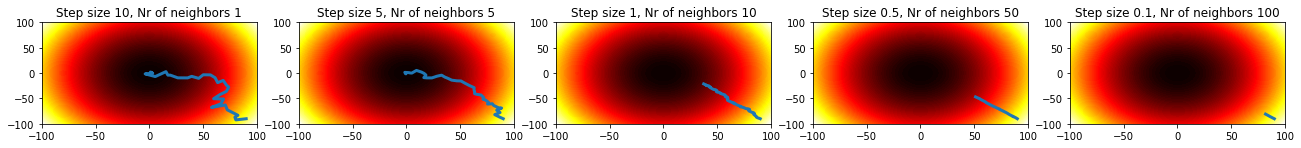

In [11]:

#increase the iteration number to see full performance
num_epochs = 100
def plot_optimization_process(ax, optimizer, title):
    ax.contourf(x1, x2, f_x, 100, cmap="hot")
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

#we will consider 2 hyperparameters- step sizes and the number of neighbors
step_sizes = [10, 5, 1, 0.5, 0.1]
neigbhors = [1, 5, 10, 50, 100]

fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(18, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    step_size = step_sizes[i]
    nr_neighbors = neigbhors[i]
    
    dfo = DFO(obj_fun=obj_fun, step_size=step_size, nr_neigbors=nr_neighbors)
    plot_optimization_process(axs[i], optimizer=dfo, title="Step size " + str(dfo.step_size) + ", Nr of neighbors " + str(dfo.nr_neigbors))



**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** 


- Comments: The given algorithm has two hyperparameters that are significantly influencing the performance of the algorithm- step size and the number of neighbors that are taken into account. The smaller is the step size, the more precise is the alogirthm. The greater the number of neighbors, the better the algorithm. By combining both parameters, the algorithm is more efficient.  

- The strong points of this algorithm is the local exploration which is done by random sampling of a specific number of neighbors. We do not choose one random point nearby- instead we explore several random points and find the best. Also, it is easy understadable and striaghtforward algorithm. Finally, it is also adaptive since the ability to change the hyperparameters, it can handle various different functions. 

- The potential weak points would be the issue of local minima. If the function wasn't convex, it could possibly stuck in the local minima instead of finding the global minima. Also, the speed of the algorithm is quite slow, since it takes many iterations due to the step size (especially in the case of small step size) and picking the best neighbor from many options (espeially if we are picking from many options). For some other functions, it could be challanging to find the most suitable hyperparameters, for high-dimensional and very complex functions- find a minimum at all.

- Problems: deciding on hyperparameters. As we can see in the visualization, one optimal example of the step size and nr of neighbors would be 1 and 10 accordingly. However, while implementing the algorithm it was hard to decide on which values to choose. Another problem was generalization. While this algorihm could work well for simple functions, it would need some improvements to be able to use it for any function.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: Gradient descent uses derivatives to update the parameters in the correct direction, while DFO does not rely on the gradient information, instead it evaluates the function and updates the parameters by using, for example, random factor or pattern search. The DFO approach could be slower in convergence than GD approach, especially in the case of a smooth landscape. However, DFO methods would be more useful if the objective function is not smooth, not differentiable, and not convex. In general, the choice between which approach to choose depends on the objective function.


**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: Again it depends on the objective function. Mathematically, DFO is more simple since it does not require calculus knowledge and complex calculations and this approach would be preferable, when calculating gradient is impossible or too expensive, however, if the function meets all the requirements for GD (it is smooth, differentiable, convex), GD might me more efficient. DFO might be also more useful for black-box optimization problems, when, for example, the function is unknown. In general, for non complex functions it is easier to implement gradient descent.